In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# read
n_LF, n_HF, rel_error = np.loadtxt('error_function_Frontera.txt', unpack=True, usecols=(0,1,2))

In [3]:
error_mean = rel_error.mean()
error_var = np.var(rel_error)

In [4]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    eta = pm.Normal("eta", mu=10, sigma=1)
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = pm.LogNormal("rho", mu=1, sigma=1)
    beta_L = pm.Normal("beta_L", mu=1, sigma=.3)
    beta_H = pm.Normal("beta_H", mu=3, sigma=1)
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = pm.Normal("beta_H2", mu=3, sigma=1)
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = pm.Normal("alpha_L", mu=10, sigma=3)
    alpha_1 = pm.Normal("alpha_1", mu=10, sigma=3)
    alpha_2 = pm.Normal("alpha_2", mu=10, sigma=3)
    # rho_H = pm.Normal("rho_H", mu=1, sigma=.2)

    sigma = pm.HalfNormal("sigma", sigma=.1)

    # Expected value of outcome
    mu = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))

    # Likelihood (sampling distribution) of observations
    rel_error_obs = pm.Normal("rel_error_obs", mu=mu, sigma=sigma, observed=np.log10(rel_error))

In [5]:
error_mean

0.046551409833333335

In [6]:
with basic_model:
    # draw 2000 posterior samples
    # idata = pm.sample(2000, tune=1000)
    idata = pm.sample(6000, tune=2000, chains=4) # chains=6 would still use 4 cores

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, rho, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 112 seconds.


In [7]:
dict(idata)

{'posterior': <xarray.Dataset> Size: 2MB
 Dimensions:  (chain: 4, draw: 6000)
 Coordinates:
   * chain    (chain) int64 32B 0 1 2 3
   * draw     (draw) int64 48kB 0 1 2 3 4 5 6 ... 5994 5995 5996 5997 5998 5999
 Data variables:
     alpha_1  (chain, draw) float64 192kB 10.02 7.759 13.23 ... 6.027 7.221 9.617
     alpha_2  (chain, draw) float64 192kB 17.91 18.35 20.69 ... 18.68 18.07 21.33
     alpha_L  (chain, draw) float64 192kB 7.193 10.38 6.474 ... 7.461 7.803 10.78
     beta_H   (chain, draw) float64 192kB 0.7005 0.6424 0.6353 ... 0.6613 0.7531
     beta_H2  (chain, draw) float64 192kB 1.999 2.011 1.988 ... 2.096 2.047 1.948
     beta_L   (chain, draw) float64 192kB 1.163 1.177 1.169 ... 1.125 1.164 1.182
     eta      (chain, draw) float64 192kB 7.96 8.352 9.486 ... 10.18 9.395 8.849
     rho      (chain, draw) float64 192kB 0.2739 0.2376 0.1784 ... 0.2146 0.3051
     sigma    (chain, draw) float64 192kB 0.09447 0.09415 ... 0.09933 0.0906
 Attributes:
     created_at:            

In [8]:
idata.posterior.data_vars

Data variables:
    alpha_1  (chain, draw) float64 192kB 10.02 7.759 13.23 ... 6.027 7.221 9.617
    alpha_2  (chain, draw) float64 192kB 17.91 18.35 20.69 ... 18.68 18.07 21.33
    alpha_L  (chain, draw) float64 192kB 7.193 10.38 6.474 ... 7.461 7.803 10.78
    beta_H   (chain, draw) float64 192kB 0.7005 0.6424 0.6353 ... 0.6613 0.7531
    beta_H2  (chain, draw) float64 192kB 1.999 2.011 1.988 ... 2.096 2.047 1.948
    beta_L   (chain, draw) float64 192kB 1.163 1.177 1.169 ... 1.125 1.164 1.182
    eta      (chain, draw) float64 192kB 7.96 8.352 9.486 ... 10.18 9.395 8.849
    rho      (chain, draw) float64 192kB 0.2739 0.2376 0.1784 ... 0.2146 0.3051
    sigma    (chain, draw) float64 192kB 0.09447 0.09415 ... 0.09933 0.0906

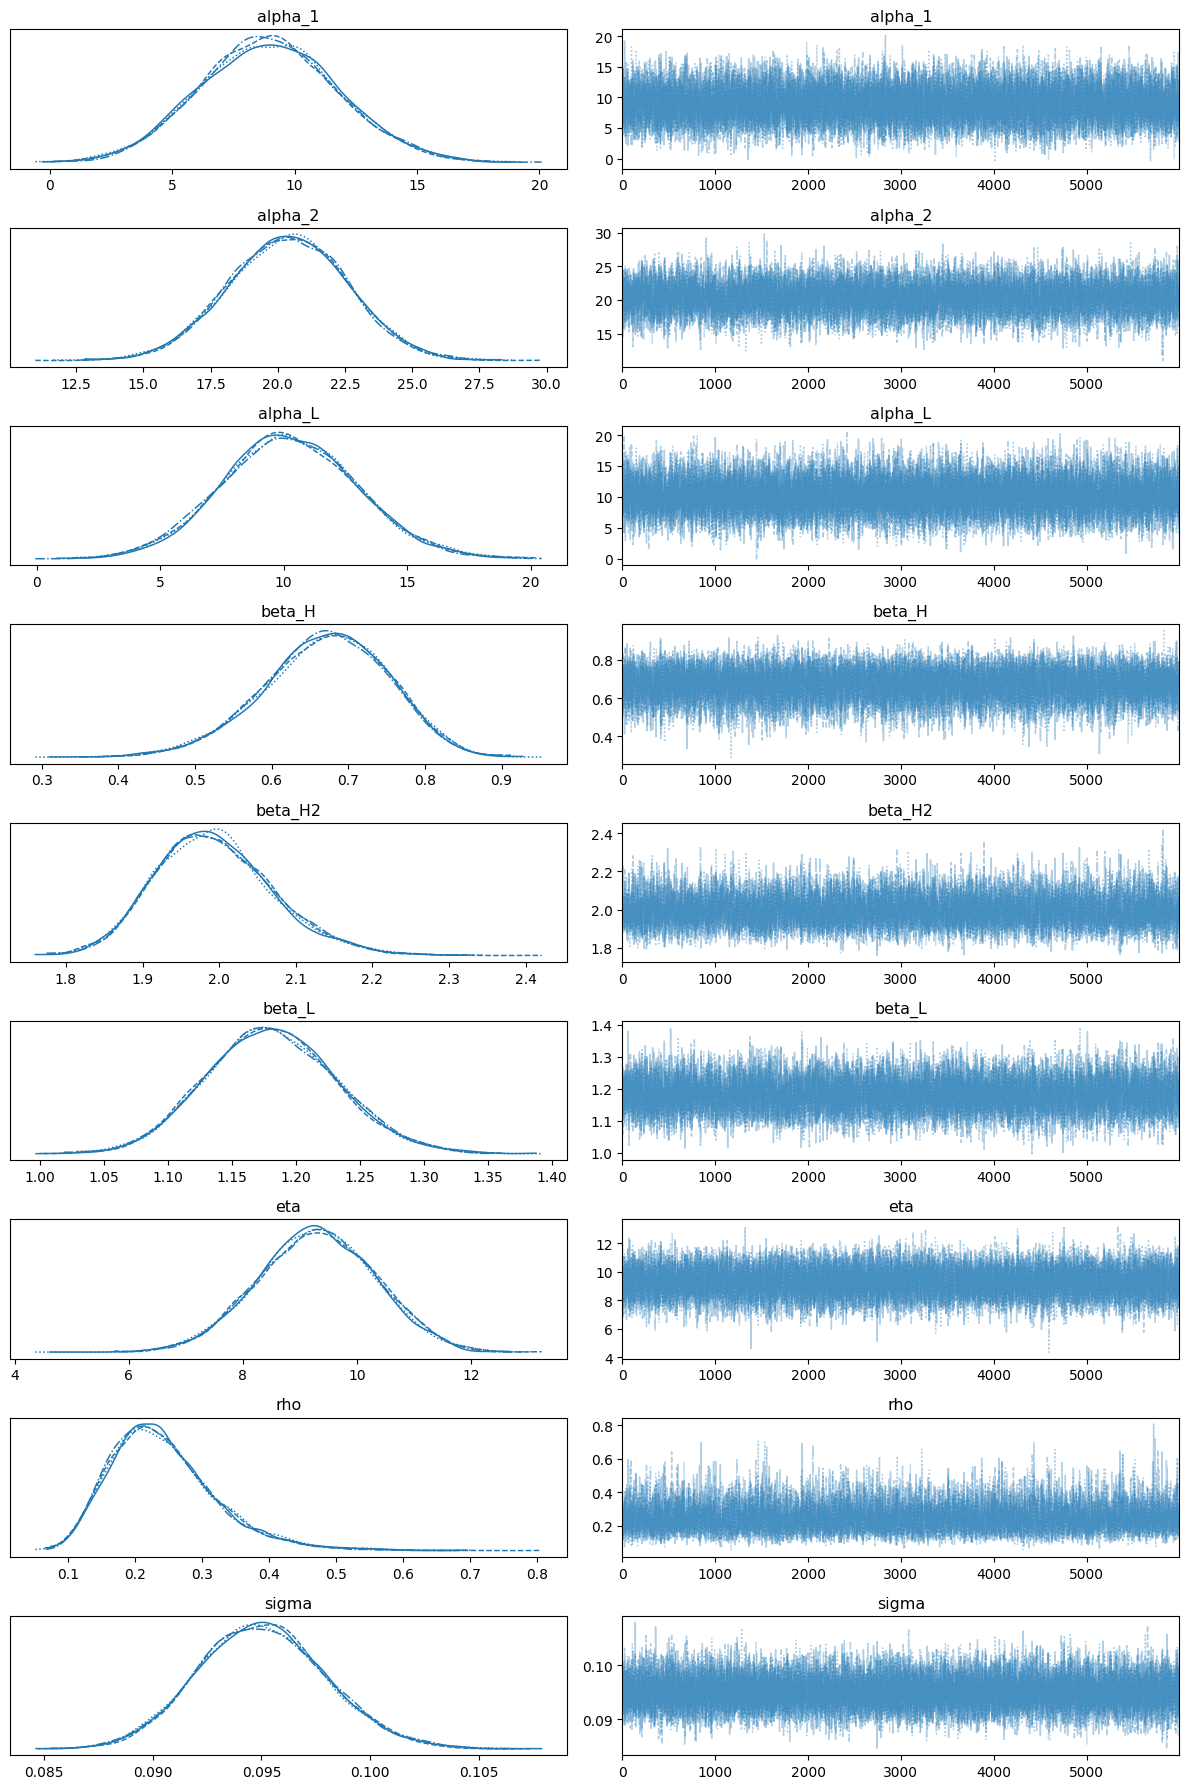

In [9]:
az.plot_trace(idata)
plt.tight_layout()

In [10]:
posterior_eta = idata["posterior"]["eta"]
credible_interval_eta = np.percentile(posterior_eta, [16, 50, 84])
posterior_rho = idata["posterior"]["rho"]
credible_interval_rho = np.percentile(posterior_rho, [16, 50, 84])
posterior_beta_L = idata["posterior"]["beta_L"]
credible_interval_beta_L = np.percentile(posterior_beta_L, [16, 50, 84])
posterior_beta_H = idata["posterior"]["beta_H"]
credible_interval_beta_H = np.percentile(posterior_beta_H, [16, 50, 84])
print(credible_interval_eta)
print(credible_interval_rho)
print(credible_interval_beta_L)
print(credible_interval_beta_H)


[ 8.26903704  9.29949182 10.32190491]
[0.16656091 0.23113944 0.31600887]
[1.13043715 1.17997408 1.23157498]
[0.5884829  0.67415999 0.75206867]


In [11]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,8.974,2.805,3.837,14.408,0.023,0.017,14543.054,15758.963,1.0
alpha_2,20.381,2.222,16.174,24.465,0.022,0.015,10561.582,12927.224,1.0
alpha_L,10.256,2.751,4.909,15.320,0.021,0.015,17963.905,15732.502,1.0
beta_H,0.670,0.082,0.515,0.821,0.001,0.001,12525.551,12437.192,1.0
beta_H2,1.994,0.078,1.856,2.148,0.001,0.001,9164.458,11696.890,1.0
beta_L,1.181,0.051,1.087,1.277,0.000,0.000,10548.362,13477.161,1.0
eta,9.295,1.027,7.381,11.214,0.008,0.006,16465.120,14907.752,1.0
rho,0.242,0.080,0.107,0.391,0.001,0.001,9582.626,11567.575,1.0
sigma,0.095,0.003,0.089,0.100,0.000,0.000,22092.236,16587.992,1.0


In [12]:
posterior_eta.values.flatten()

array([ 7.9604746 ,  8.3519761 ,  9.48577887, ..., 10.18100827,
        9.3945386 ,  8.84886939])

In [13]:
# Alternative method to find mode using histogram
def get_histogram_mode(data, bins=500):
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mode = bin_centers[np.argmax(hist)]
    return mode

# Extracting modes using histogram method for comparison
hist_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_histogram_mode(samples)
    hist_modes[var] = mode

print("Histogram modes of each posterior:")
for var, mode in hist_modes.items():
    print(f"{var}: {mode}")

Histogram modes of each posterior:
alpha_1: 9.148634792876067
alpha_2: 20.68057204828696
alpha_L: 10.336437586660763
beta_H: 0.6769375801601656
beta_H2: 1.9693465099568148
beta_L: 1.1851555212967242
eta: 9.180582707595432
rho: 0.2043253342838957
sigma: 0.09505097667012101


In [14]:
from scipy.stats import gaussian_kde

# Assuming `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Function to compute the mode using KDE
def get_mode_kde(data):
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 1000)
    mode = x_grid[np.argmax(kde(x_grid))]
    return mode

# Extracting modes for each parameter using KDE
kde_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_mode_kde(samples)
    kde_modes[var] = mode

print("KDE modes of each posterior:")
for var, mode in kde_modes.items():
    print(f"{var}: {mode}")


KDE modes of each posterior:
alpha_1: 8.784863219366315
alpha_2: 20.5014988326511
alpha_L: 9.853707058457342
beta_H: 0.6786489667470289
beta_H2: 1.986788762152859
beta_L: 1.177813705634395
eta: 9.301189874772124
rho: 0.21129438070376275
sigma: 0.09489777673436608


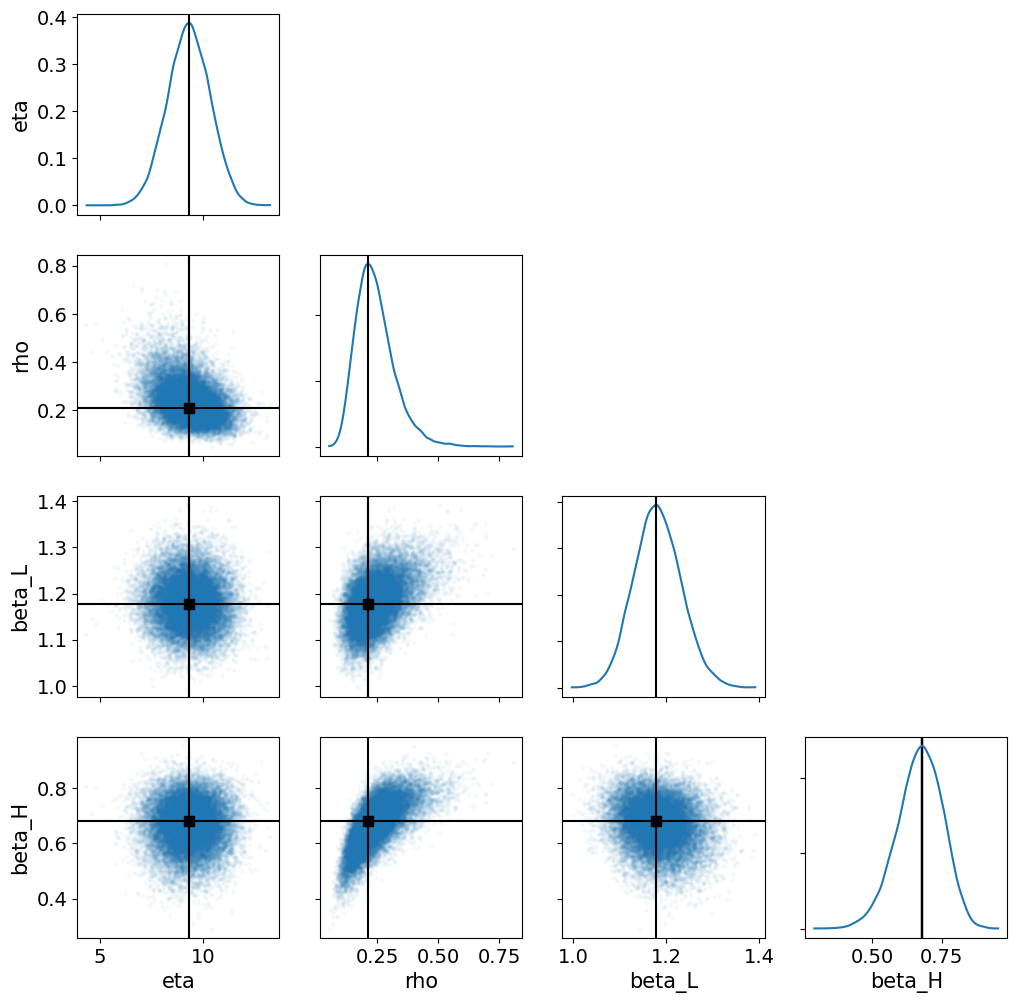

In [15]:
az.plot_pair(
    idata,
    marginals=True,
    point_estimate="mode",
    figsize=(12, 12),
    scatter_kwargs={"alpha": 0.05},
    var_names=["eta", "rho", "beta_L", "beta_H"],
);

In [16]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):
    eta = 11.20294568777112
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 34422.595850790254
    beta_L = 1.1406839520015446
    beta_H = 4.145389781446169
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 2.713544143928366
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 7.8176404049598816
    alpha_1 = 18.553167013696203
    alpha_2 = 7.5153891398955235

    sigma_lg_Phi = 0.21450697746101002   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [17]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)

In [18]:
loss

4.632325106349383